# Fig. 5. Results of the t-SNE visualization of the Spatio-temporal Unitized Model embedding on the PEMS04 dataset. 

In [1]:
cs={
    'b1': '#BADDF5',
    'y1': '#FFD99B',
    'g1': '#B4E2D3',
    'r1': '#FEA4AC',
    'r2': '#FFC3C7',
    'b2': '#5290E2',
    'b3': '#6e8fb2',
    'g2': '#7da494',
    'y2': '#eab67a',
    'r3': '#e5a79a',
    'r4': '#c16e71',
    'b4': '#abc8e5',
    'p1': '#d8a0c1',
    'p2': '#9f8db8',
    'g3': '#d0d08a'
}

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

In [3]:
mlrf = torch.load('./mlrf_embedding.pt', map_location=torch.device('cpu'))
mlrf = torch.tensor(mlrf, dtype=torch.float32)
B, T, N, D= mlrf.shape
data_for_tsne = mlrf.reshape(B * T * D, N)
mlrf_tsne = TSNE(n_components=2, random_state=42)
mlrf_tsne_result = mlrf_tsne.fit_transform(data_for_tsne)

backbone = torch.load('./backbone_embedding.pt', map_location=torch.device('cpu'))
backbone = torch.tensor(backbone, dtype=torch.float32)
B, T, N, D= backbone.shape
data_for_tsne = backbone.reshape(B * T * D, N)
backbone_tsne = TSNE(n_components=2, random_state=42)
backbone_tsne_result = backbone_tsne.fit_transform(data_for_tsne)

/tmp/ipykernel_2590760/3332766800.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mlrf = torch.tensor(mlrf, dtype=torch.float32)
/tmp/ipykernel_2590760/3332766800.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  backbone = torch.tensor(backbone, dtype=torch.float32)


In [4]:
# 准备颜色标签，标红 33 和 93 节点, 标绿 37 和 61 节点, 标蓝 52 和 114 节点, 其他标记为灰色
node_num = N
colors = [
    'red' if i % node_num == 33 or i % node_num == 52 else
    'green' if i % node_num == 37 or i % node_num == 61 else
    'blue' if i % node_num == 93 or i % node_num == 114 else
    cs['p1'] for i in range(data_for_tsne.shape[0])
]
print(data_for_tsne.shape)

torch.Size([144, 307])


In [5]:
# 计算距离并绘制椭圆
def plot_tsne_with_annotations(ax, tsne_results, title, xlabel=""):
    ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.5, edgecolor='w', s=60)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_facecolor('#f0f0f0')
    ax.set_xlabel(xlabel, fontsize=14)
    
    # 绘制椭圆并标注距离
    for i in range(len(tsne_results)):
        if colors[i] != '#d8a0c1':
            for j in range(i + 1, len(tsne_results)):
                if colors[j] == colors[i]:
                    dist = np.linalg.norm(tsne_results[i] - tsne_results[j])
                    center = (tsne_results[i] + tsne_results[j]) / 2
                    width = 1.2*dist
                    height = 1.2*dist / 2  # 假设短轴为长轴的一半
                    angle = np.degrees(np.arctan2(tsne_results[j][1] - tsne_results[i][1], tsne_results[j][0] - tsne_results[i][0]))
                    ellipse = Ellipse(center, width, height, angle=angle, color=colors[i], alpha=0.2)
                    ax.add_patch(ellipse)
                    ax.annotate(f'{dist:.2f}', center, color=colors[i])
    
    ax.set_title(title)

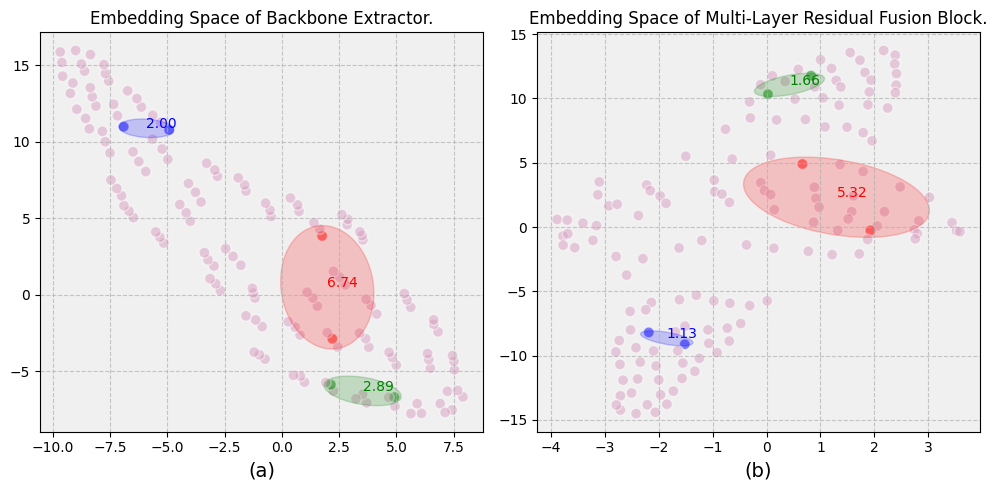

In [6]:
# 创建包含两个子图的图形
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 可视化 t-SNE 结果
plot_tsne_with_annotations(axs[0], backbone_tsne_result, 'Embedding Space of Backbone Extractor.','(a)')
plot_tsne_with_annotations(axs[1], mlrf_tsne_result, 'Embedding Space of Multi-Layer Residual Fusion Block.','(b)')

plt.tight_layout()
plt.savefig(f'tsne_results.pdf', dpi=800, bbox_inches='tight')
plt.show()